In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [13]:
EXPERIMENT = 'bivariate_power'
TAG = ''
df = pd.read_csv(f'./results/{EXPERIMENT}_results{TAG}.csv', sep=', ', engine='python')

In [32]:
plot_df = df

x_var_rename_dict = {
    'sample_size': '# Samples',
    'Number of environments': '# Environments',
    'Fraction of shifting mechanisms': 'Shift fraction',
    'dag_density': 'Edge density',
    'n_variables': '# Variables',
}

plot_df = df.rename(
        x_var_rename_dict, axis=1
    ).rename(
        {'Method': 'Test', 'Soft': 'Score'}, axis=1
    ).replace(
        {
            'er': 'Erdos-Renyi',
            'ba': 'Hub',
            'PC (pool all)': 'Full PC (oracle)',
            'Full PC (KCI)': r'Pooled PC (KCI) [25]',
            'Min changes (oracle)': 'MSS (oracle)',
            'Min changes (KCI)': 'MSS (KCI)',
            'Min changes (GAM)': 'MSS (GAM)',
            'Min changes (Linear)': 'MSS (Linear)',
            'Min changes (FisherZ)': 'MSS (FisherZ)',
            'MC': r'MC [11]',
            False: 'Hard',
            True: 'Soft',
        }
)

plot_df = plot_df.loc[
    (~plot_df['Test'].isin(['Full PC (oracle)', 'MSS (oracle)'])) &
    (plot_df['# Environments'] == 2) &
    (plot_df['Score'] == 'Hard')
]

plot_df = plot_df.replace({
    '[[];[0]]': 'P(X1)',
    '[[];[1]]': 'P(X2|X1)',
    '[[];[]]': 'Neither',
    '[[];[0;1]]': 'Both',
})

In [35]:
plot_df['Test'].unique()

array(['MSS (KCI)', 'MSS (Linear)', 'MSS (GAM)', 'MSS (FisherZ)',
       'Pooled PC (KCI) [25]', 'MC [11]'], dtype=object)

In [33]:
intv_targets = ['P(X1)', 'P(X2|X1)', 'Neither', 'Both']
ax_var = 'intervention_targets'

for targets in intv_targets:
    display(plot_df[plot_df[ax_var] == targets].groupby('Test').mean().reset_index().head(3))

,Test,params_index,# Variables,n_total_environments,# Samples,reps,# Environments,Rep,Number of possible DAGs,MEC size,MEC total edges,MEC unoriented edges,True orientation rate,False orientation rate,Precision,Recall,Average precision
0,MC [11],0.0,2.0,2.0,500.0,50.0,2.0,24.5,1.58,2.0,1.0,1.0,0.24,0.18,0.82,0.24,0.80
1,MSS (FisherZ),0.0,2.0,2.0,500.0,50.0,2.0,24.5,1.34,2.0,1.0,1.0,0.58,0.08,0.92,0.58,0.90
2,MSS (GAM),0.0,2.0,2.0,500.0,50.0,2.0,24.5,1.70,2.0,1.0,1.0,0.18,0.12,0.88,0.18,0.56


,Test,params_index,# Variables,n_total_environments,# Samples,reps,# Environments,Rep,Number of possible DAGs,MEC size,MEC total edges,MEC unoriented edges,True orientation rate,False orientation rate,Precision,Recall,Average precision
0,MC [11],1.0,2.0,2.0,500.0,50.0,2.0,24.5,1.24,2.0,1.0,1.0,0.70,0.06,0.94,0.70,0.96
1,MSS (FisherZ),1.0,2.0,2.0,500.0,50.0,2.0,24.5,1.50,2.0,1.0,1.0,0.00,0.50,0.50,0.00,0.42
2,MSS (GAM),1.0,2.0,2.0,500.0,50.0,2.0,24.5,1.24,2.0,1.0,1.0,0.72,0.04,0.96,0.72,0.98


,Test,params_index,# Variables,n_total_environments,# Samples,reps,# Environments,Rep,Number of possible DAGs,MEC size,MEC total edges,MEC unoriented edges,True orientation rate,False orientation rate,Precision,Recall,Average precision
0,MC [11],2.0,2.0,2.0,500.0,50.0,2.0,24.5,1.92,2.0,1.0,1.0,0.04,0.04,0.96,0.04,0.66
1,MSS (FisherZ),2.0,2.0,2.0,500.0,50.0,2.0,24.5,1.94,2.0,1.0,1.0,0.02,0.04,0.96,0.02,0.82
2,MSS (GAM),2.0,2.0,2.0,500.0,50.0,2.0,24.5,1.92,2.0,1.0,1.0,0.04,0.04,0.96,0.04,0.72


,Test,params_index,# Variables,n_total_environments,# Samples,reps,# Environments,Rep,Number of possible DAGs,MEC size,MEC total edges,MEC unoriented edges,True orientation rate,False orientation rate,Precision,Recall,Average precision
0,MC [11],3.0,2.0,2.0,500.0,50.0,2.0,24.5,1.84,2.0,1.0,1.0,0.00,0.16,0.84,0.00,0.60
1,MSS (FisherZ),3.0,2.0,2.0,500.0,50.0,2.0,24.5,1.52,2.0,1.0,1.0,0.04,0.44,0.56,0.04,0.52
2,MSS (GAM),3.0,2.0,2.0,500.0,50.0,2.0,24.5,1.80,2.0,1.0,1.0,0.04,0.16,0.84,0.04,0.74


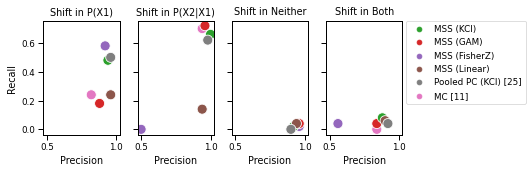

In [39]:
sns.set_context('paper')
fig, axes = plt.subplots(1, 4, sharey=True, sharex=True, figsize=(7.5, 2.5))

intv_targets = ['P(X1)', 'P(X2|X1)', 'Neither', 'Both']
ax_var = 'intervention_targets'
x_var = 'Precision' # 'False orientation rate' # 
y_var = 'Recall' # 'True orientation rate'# 
hue = 'Test'

for targets, ax in zip(intv_targets, axes.flatten()):
    mean_df = plot_df[plot_df[ax_var] == targets].groupby('Test').mean().reset_index()
    std_df = plot_df[plot_df[ax_var] == targets].groupby('Test')[['Precision', 'Recall']].std().reset_index()
    std_df.rename(
        {'Precision': 'Precision std', 'Recall': 'Recall std'}, axis=1
    )
    
    g = sns.scatterplot(
        data=plot_df[plot_df[ax_var] == targets].groupby('Test').mean().reset_index(),
        x=x_var,
        y=y_var,
        hue=hue,
        ax=ax,
        # markers=['d', 'P', 's'],
        palette=[
            sns.color_palette("tab10")[i]
            for i in [2, 3, 4, 5, 7, 6] # 3, 4, 5, 
        ],
        hue_order=[
            'MSS (KCI)',
            'MSS (GAM)',
            'MSS (FisherZ)',
            'MSS (Linear)',
            'Pooled PC (KCI) [25]',
            'MC [11]',
        ],
        legend='full',
        # alpha=1,
        s=100
    )
    # ax.axvline(0.05, ls=':', c='grey')
    ax.set_title(f'Shift in {targets}')
    
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
for ax in axes[:-1]:
    ax.get_legend().remove()
# ax.set_ylim([0, 1])
# ax.set_xlim([0, 1])
plt.tight_layout()
plt.savefig('./figures/bivariate_power_plots.pdf')
plt.show()